In [36]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lightcurve_plots import plot_lc, plot_phase

In [48]:
PUNTO = 2
lc_name='lc208.data'
set='6426V_2'
color='green'

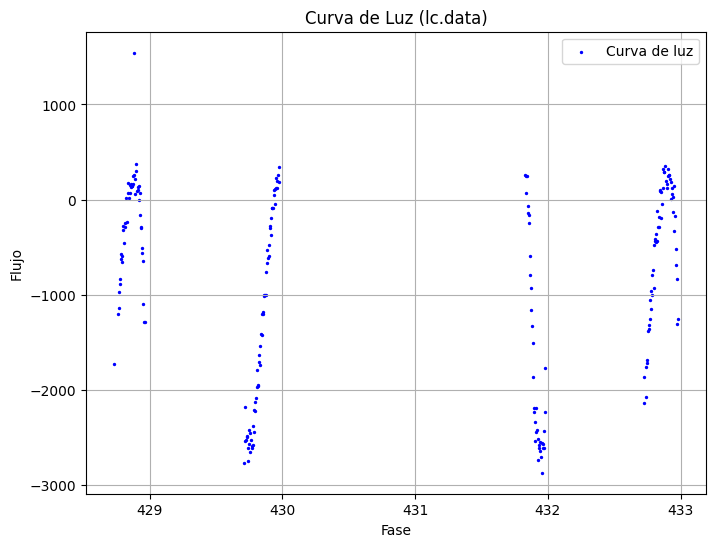

In [49]:
plot_lc(lc_path=f'../images{set}/{lc_name}')

🌀 Mejor periodo estimado: 0.363045 días


/tmp/ipykernel_17243/3358846910.py:24: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  lc_coords =  int(lc_data[2]), int(lc_data[3])


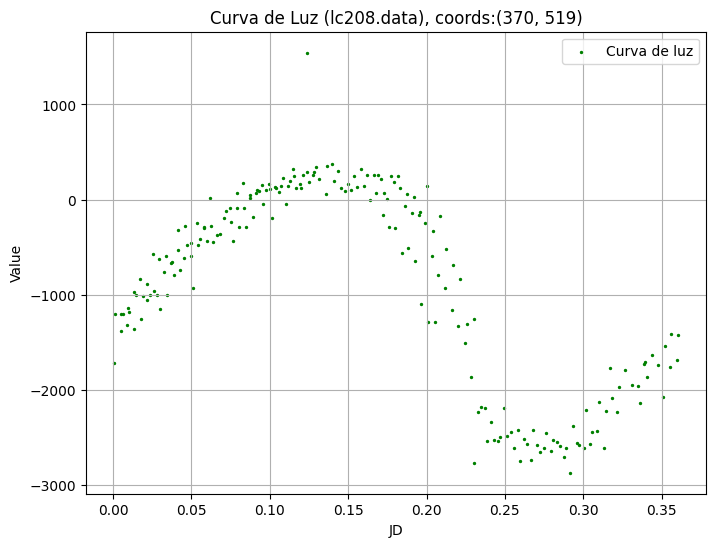

In [50]:
from astropy.timeseries import LombScargle
import numpy as np

#output_dir = f"./imagenes_curvas_{set}" # aqui se guardan
    
# Carga de datos
data = np.loadtxt(f'../images{set}/{lc_name}')
jd = data[:, 0] # fecha (JD)
values = data[:, 1] # valores (que son?)

# Calculamos el periodograma ====================
frequency, power = LombScargle(jd, values).autopower()

# Obtenemos el periodo con la potencia más alta
best_period = 1 / frequency[np.argmax(power)]
print(f"🌀 Mejor periodo estimado: {best_period:.6f} días")

phased_time = (jd % best_period)
# xxxxxxxxxxxxxxxxxxxxxxxxxx ====================

# coordenadas
coords_data = pd.read_csv(f'../register{set}/phot.data', sep=' ', header=None)
lc_data = coords_data[coords_data[4] == lc_name]
lc_coords =  int(lc_data[2]), int(lc_data[3])

# Generar la grafica
plt.figure(figsize=(8, 6))
plt.scatter(phased_time, values, s=PUNTO, color=color, label='Curva de luz')
plt.xlabel('JD')
plt.ylabel('Value')
plt.title(f'Curva de Luz ({lc_name}), coords:{lc_coords}')
plt.legend()
plt.grid()
plt.show()